In [1]:
import numpy as np
import pydub
import matplotlib.pyplot as plt
import sys

In [2]:
path = "./songs/epic_part_beginning.mp3"
sound = pydub.AudioSegment.from_mp3(path)

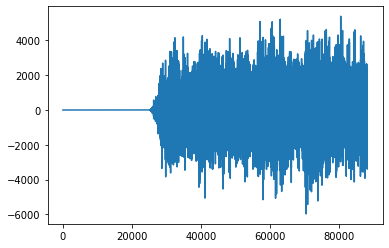

88200


In [3]:
plot_1sec = sound[:1000].get_array_of_samples()
plt.plot(plot_1sec)
plt.show()
print(len(sound[:1000].get_array_of_samples()))

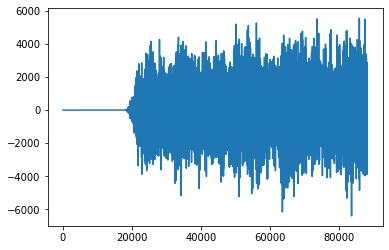

88200


In [4]:
original = pydub.AudioSegment.from_mp3("./songs/epic.mp3")
plot_1sec = original[:1000].get_array_of_samples()
plt.plot(plot_1sec)
plt.show()
print(len(original[:1000].get_array_of_samples()))

In [5]:
song = np.array(original[:10000].get_array_of_samples())
# song = np.array(sound.get_array_of_samples())

size = len(song)
duration = sound.duration_seconds
print(duration)
chunk_size = 4000
sampled_chunk_size = int(size/chunk_size)

10.031020408163265


In [6]:
sampled = np.zeros(shape=(sampled_chunk_size, chunk_size), dtype=np.complex_)

for i in range(sampled_chunk_size):
    time_variations = np.zeros(chunk_size, dtype=np.complex_)

    for j in range(chunk_size):
        time_variations[j] = complex(song[i * chunk_size + j], 0)
            
#     print(time_variations)
    sampled[i] = np.fft.fft(time_variations)
#     print(sampled[i])
# plt.plot(sampled)
# plt.show()

In [7]:
# for i in sampled[:100]:
#     for j in i:
#         if j.real != 0:
#             print(abs(j.real))

In [8]:
FREQUENCIES = [40, 80, 120, 180, 220, 300]

def get_range_of_frequency(frq):
    return max(list(range(len(FREQUENCIES))), key = lambda x: FREQUENCIES[x] > frq)

In [9]:
peaks = np.zeros(shape=(sampled.shape[0], len(FREQUENCIES)), dtype=np.int64)
values = np.zeros(shape=(sampled.shape[0], len(FREQUENCIES)))

highest = np.zeros(shape=(sampled.shape[0], len(FREQUENCIES)))

In [10]:
def get_fuzzed(peak, fuzz):
    return peak - (peak%fuzz)

In [11]:
def fingerprint_hash(peaks):
    fuzz_factor = 2
    i = 1
    fingerprint = 0
    
    for p in peaks:
        fingerprint+=get_fuzzed(p, fuzz_factor) * i
        i*=1000
#     print("fingerprint", fingerprint.astype(np.int64))
    return fingerprint

In [12]:
def point_position(number, pos=2): #pos=2 -> 3 digit number
    while(number < 10**pos):
        number*=10
    num = number.astype(np.int64)
#     print("number: ", num)
    return num

unique: 217


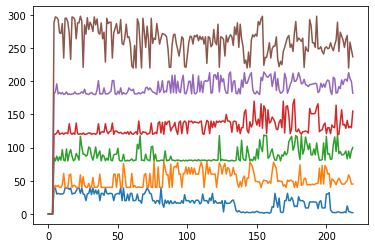

In [13]:
hashed = np.zeros(shape=sampled.shape[0], dtype=np.int64)
unique = []

for i in range(0, sampled.shape[0]):
    for frq in range(0, 300):
        magnitude = np.log(np.abs(sampled[i][frq])+1)
#         if magnitude != 0:
#             print(np.log2(np.abs(sampled[i][frq])+1))
        range_index = get_range_of_frequency(frq)
#         print("magnitude: ", magnitude)
#         print("highest: ", highest[i][range_index])

#         print(highest[i][range_index])
#         if magnitude > highest[i][range_index]:
#             highest[i][range_index] = frq
#             values[i][range_index] = magnitude
#             peaks[i][range_index] = point_position(magnitude)

        if magnitude > highest[i][range_index]:
            highest[i][range_index] = magnitude
            values[i][range_index] = frq
            peaks[i][range_index] = frq

    hashed[i] = fingerprint_hash(peaks[i])
    unique.append(tuple(values[i]))
# plt.hist(hashed)
print("unique:", len(list(set(unique))))
plt.plot(unique)
plt.show()
# print(unique)
# print("hashed:", len(hashed[:100]))
# for i in range(len(hashed)):
#     print(hashed[i])